In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6961,8155-IBNHG,Female,0,Yes,No,24,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),75.40,1747.85,Yes
3626,0396-UKGAI,Male,0,No,Yes,23,Yes,No,DSL,No,Yes,No,Yes,No,No,Month-to-month,Yes,Bank transfer (automatic),55.30,1284.2,No
6015,2325-NBPZG,Female,0,No,No,3,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.55,233.65,No
3969,2920-RNCEZ,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.95,69.95,No
3884,4521-YEEHE,Female,0,Yes,No,18,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Electronic check,88.85,1594.75,No
1191,8221-HVAYI,Male,0,Yes,Yes,35,Yes,Yes,DSL,Yes,Yes,Yes,Yes,No,No,Two year,Yes,Credit card (automatic),69.15,2490.15,No
3744,9040-KZVWO,Male,0,No,No,26,Yes,No,Fiber optic,No,Yes,No,No,No,No,One year,No,Bank transfer (automatic),75.50,2018.1,No
6193,5716-LIBJC,Female,0,No,Yes,13,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),104.15,1299.1,No
6526,3190-XFANI,Male,0,No,Yes,49,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),100.60,5069.65,Yes
6546,9828-QHFBK,Male,0,No,No,24,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,51.15,1275.7,No


This dataset contains 7043 rows and 21 columns.
*   customer ID: Customer ID
*   gender: Whether the customer is a male or a female
*   SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
*   Partner: Whether the customer has a partner or not (Yes, No)
*   Dependents: Whether the customer has dependents or not (Yes, No)
*   tenure: Number of months the customer has stayed with the company
*   PhoneService: Whether the customer has a phone service or not (Yes, No)
*   MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
*   InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
*   OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
*   OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
*   DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
*   TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
*   StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
*   StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
*   Contract: The contract term of the customer (Month-to-month, One year, Two year)
*   PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
*   PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
*   MonthlyCharges: The amount charged to the customer monthly
*   TotalCharges: The total amount charged to the customer
*   Churn: Whether the customer churned or not (Yes or No
























In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
## Check the unique values
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [ ]:
## Replace blank data with nan
df['TotalCharges'] = df['TotalCharges'].replace({" " : np.nan})

In [ ]:
## Convert object to numerical data
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [ ]:
## Replace nan values with average
df['TotalCharges'] = df['TotalCharges'].replace({np.nan : df['TotalCharges'].mean()})

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


**Exploratory data analysis**

This pie chart implying the percentage of churn rate are less than not churn. This is an imbalance dataset.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f964c83a4a8>],
      dtype=object)

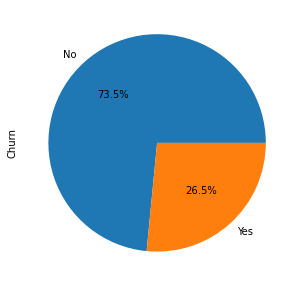

In [ ]:
churn_rat = df['Churn'].value_counts()
churn_rat.plot.pie(subplots=True, figsize=(5, 5), autopct= '%1.1f%%')

**Checking numerical data**

There are no outlier from these three features.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


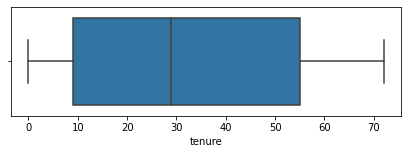

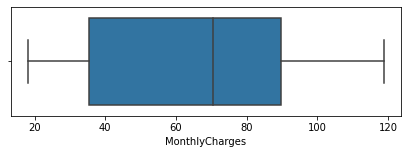

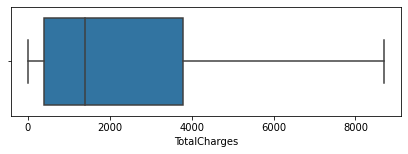

In [ ]:
for col in ['tenure', 'MonthlyCharges', 'TotalCharges'] :
  fig = plt.figure(figsize=(7,2))
  sns.boxplot(df[col])

These three box plot indicate customers who churn from company had a lower service time and lower paid for monthly charge, while monthly charge the customers who churn had a higher paid. 

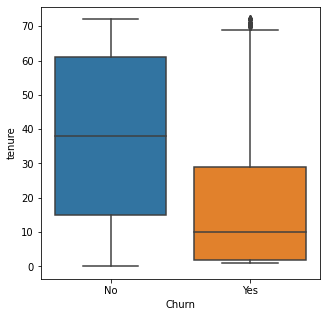

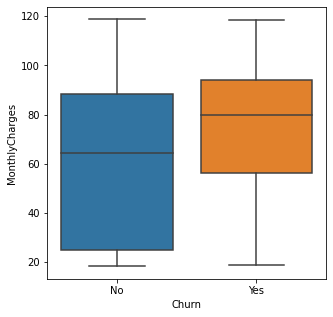

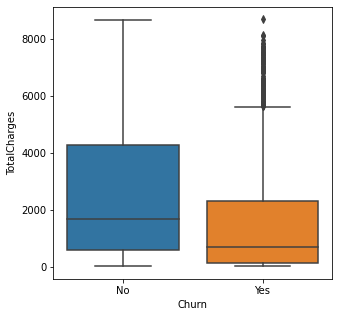

In [ ]:
for col in ['tenure', 'MonthlyCharges', 'TotalCharges'] :
  fig = plt.figure(figsize=(5,5))
  sns.boxplot(x= df['Churn'], y= df[col])

After we check the distribution of data. The distribution plot show these three numerical data are not normal distributions and the distributions between two groups for tenure and monthly charges are are obvious differences, while total charges the distributions is not quite differences.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

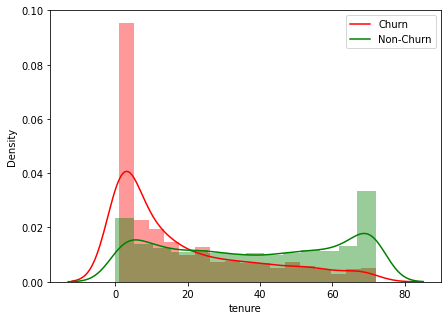

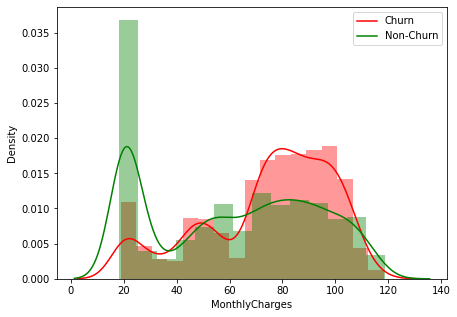

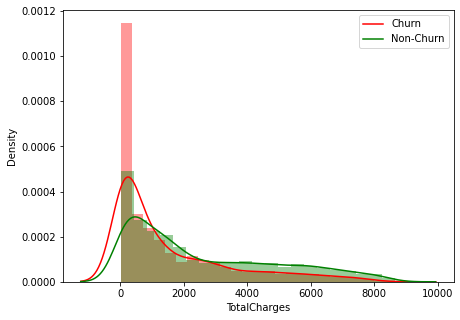

In [ ]:
for col in ['tenure', 'MonthlyCharges', 'TotalCharges'] :
  labels = ['Churn', 'Non-Churn']
  fig = plt.figure(figsize=(7, 5))
  sns.distplot(df[df['Churn'] == 'Yes'][col], color= 'Red', label='Churn', kde=True)
  sns.distplot(df[df['Churn'] == 'No'][col], color= 'Green', label='Non-Churn', kde=True)
  plt.legend(labels)

**Checking categorical data**

The churn rate between female and male are similarlity.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


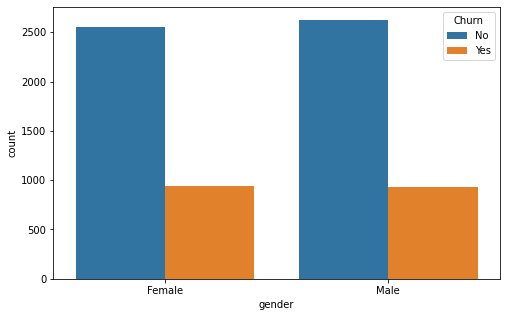

In [ ]:
fig = plt.figure(figsize=(8, 5))
sns.countplot(df['gender'], hue= df['Churn'])

Seem like ratio of churn customers in the senior citizen are more than non-senior citizen.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


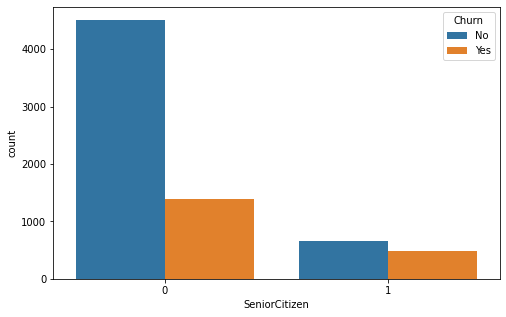

In [ ]:
fig = plt.figure(figsize=(8, 5))
sns.countplot(df['SeniorCitizen'], hue= df['Churn'])

The ratio of churn customer in no partner group are more than customer who has partner.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


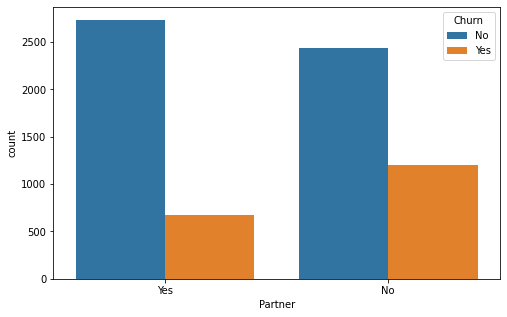

In [ ]:
fig = plt.figure(figsize=(8, 5))
sns.countplot(df['Partner'], hue= df['Churn'])

The churn rate between dependent and not dependent customers look not different quite.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


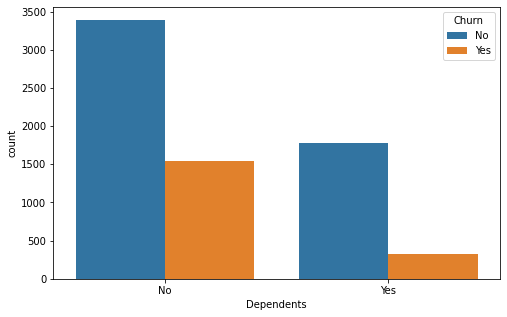

In [ ]:
fig = plt.figure(figsize=(8, 5))
sns.countplot(df['Dependents'], hue= df['Churn'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


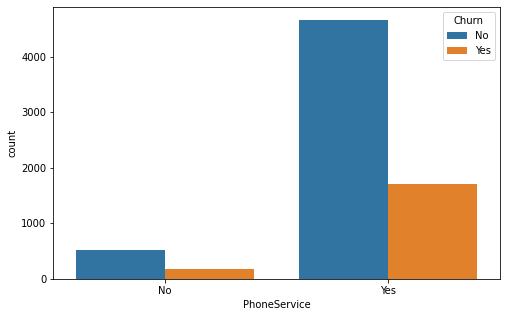

In [ ]:
fig = plt.figure(figsize=(8, 5))
sns.countplot(df['PhoneService'], hue= df['Churn'])

The cutomer who has multiplelines are slightly difference ratio.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


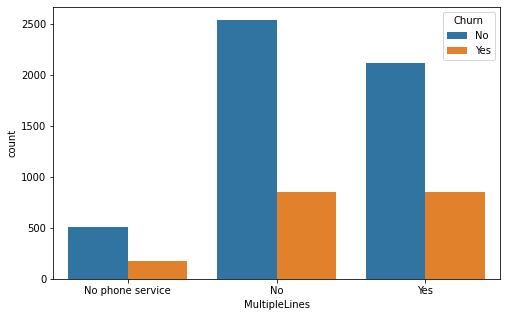

In [ ]:
fig = plt.figure(figsize=(8, 5))
sns.countplot(df['MultipleLines'], hue= df['Churn'])

After we explore the users ratio of both internet type. Found that the fiber optic users are obviously to churn more than no internet users and dsl users.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


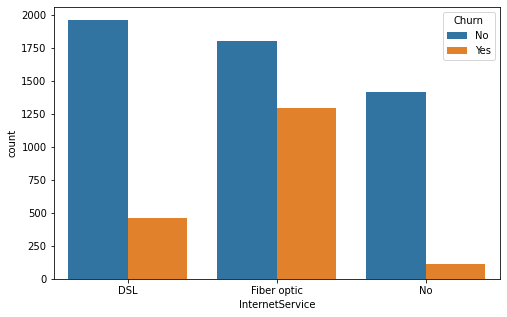

In [ ]:
fig = plt.figure(figsize=(8, 5))
sns.countplot(df['InternetService'], hue= df['Churn'])

From this below chart show that the fiber optic users are paid on monthly bill higher than DSL users. These probably because of quality not proper with the price, thus this might be resulting to the users churn. Company should be plan to improve the sevice further.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


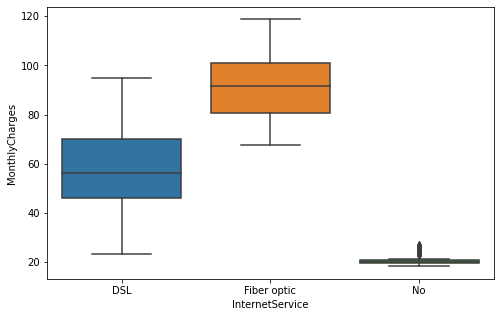

In [ ]:
fig = plt.figure(figsize=(8, 5))
sns.boxplot(df['InternetService'], df['MonthlyCharges'])

From those below charts show that the users who has no online security, online backup, device protection and tech support services are likely to churn more than ther users who has those services. In the movie streaming and TV streaming services part the churn rate not different quite. And the users who has not internet service are also not in those services. 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

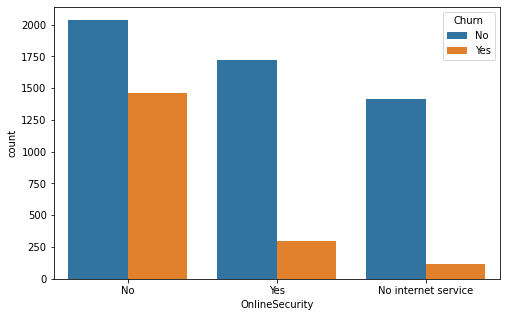

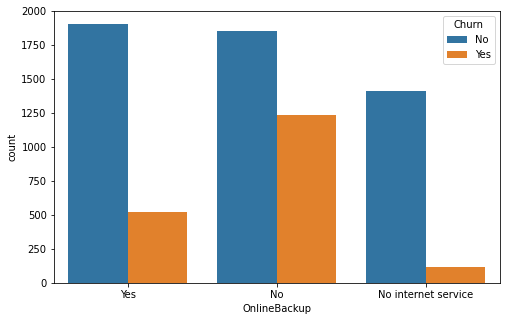

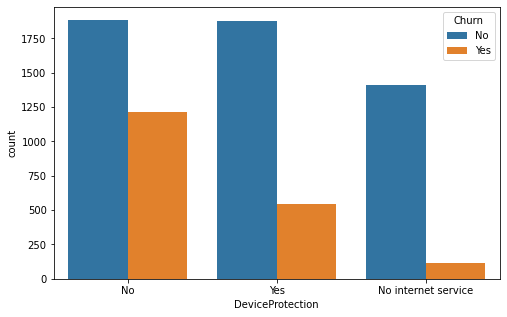

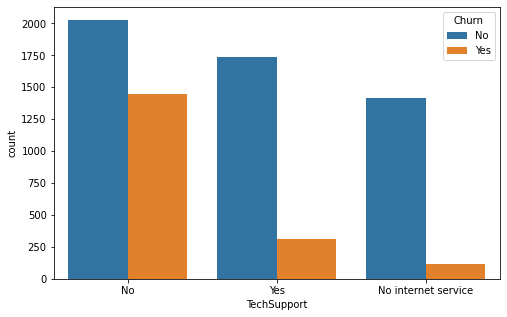

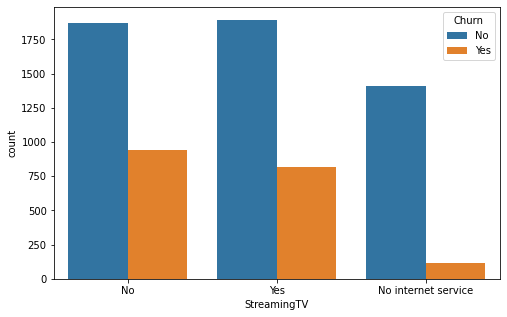

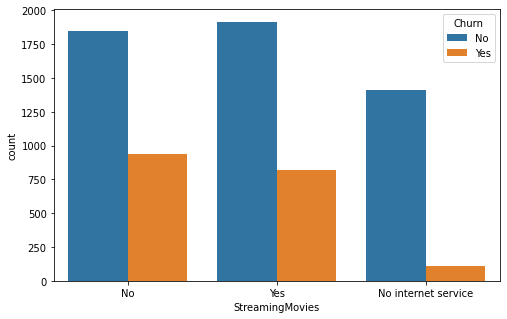

In [ ]:
for col in ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies'] :
          fig = plt.figure(figsize=(8, 5))
          sns.countplot(df[col], hue= df['Churn'])

The below graph show month to month contract users are obiviously churn more than one year contract and two year contract.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


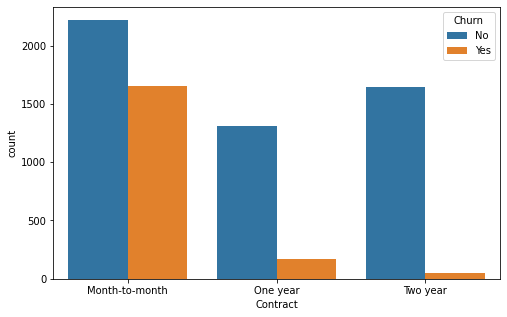

In [ ]:
fig = plt.figure(figsize=(8, 5))
sns.countplot(df['Contract'], hue= df['Churn'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


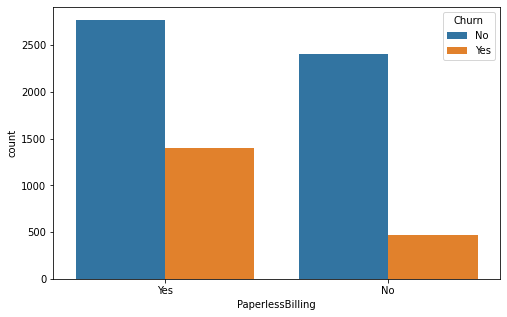

In [ ]:
fig = plt.figure(figsize=(8, 5))
sns.countplot(df['PaperlessBilling'], hue= df['Churn'])

The users who paid with electronic check are obiviously likely to churn more than other payment solutions. 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


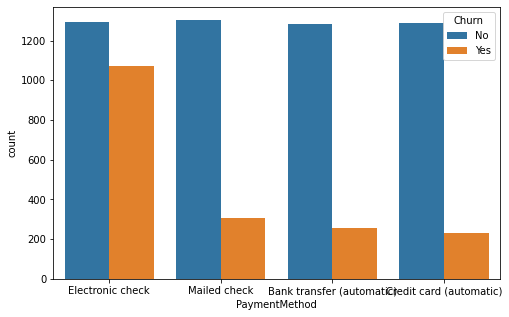

In [ ]:
fig = plt.figure(figsize=(8, 5))
sns.countplot(df['PaymentMethod'], hue= df['Churn'])

**Data Preprocessing**

In [ ]:
## Convert categorical variable into indicator variables.
Partner = pd.get_dummies(df['Partner'], drop_first= True, prefix= 'Partner')
Dependents = pd.get_dummies(df['Dependents'], drop_first= True, prefix= 'Dependents')
PhoneService = pd.get_dummies(df['PhoneService'], drop_first= True, prefix= 'PhoneService')
MultipleLines = pd.get_dummies(df['MultipleLines'], drop_first= True, prefix= 'MultipleLines')
InternetService = pd.get_dummies(df['InternetService'], drop_first= True, prefix= 'InternetService')
OnlineSecurity = pd.get_dummies(df['OnlineSecurity'], drop_first= True, prefix= 'OnlineSecurity')
OnlineBackup = pd.get_dummies(df['OnlineBackup'], drop_first= True, prefix= 'OnlineBackup')
DeviceProtection = pd.get_dummies(df['DeviceProtection'], drop_first= True, prefix= 'DeviceProtection')
TechSupport = pd.get_dummies(df['TechSupport'], drop_first= True, prefix= 'TechSupport')
StreamingTV = pd.get_dummies(df['StreamingTV'], drop_first= True, prefix= 'StreamingTV')
StreamingMovies = pd.get_dummies(df['StreamingMovies'], drop_first= True, prefix= 'StreamingMovies')
Contract = pd.get_dummies(df['Contract'], drop_first= True, prefix= 'Contract')
PaperlessBilling = pd.get_dummies(df['PaperlessBilling'], drop_first= True, prefix= 'PaperlessBilling')
PaymentMethod = pd.get_dummies(df['PaymentMethod'], drop_first= True, prefix= 'PaymentMethod')
Churn = pd.get_dummies(df['Churn'], drop_first= True, prefix= 'Churn')

In [ ]:
df2 = df[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']]

In [ ]:
df3 = pd.concat([df2, Partner, Dependents, MultipleLines, InternetService, OnlineSecurity,
                 OnlineBackup, DeviceProtection, TechSupport, Contract, PaperlessBilling,
                 PaymentMethod, StreamingTV, StreamingMovies, Churn], axis=1)
df3.sample(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Churn_Yes
845,0,15,20.55,295.95,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,1,1,0,1,0,0
5823,0,22,20.05,470.20,0,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0,1,0,0,1,1,0,1,0,0
3130,0,24,74.40,1712.90,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0
2034,0,41,60.30,2511.30,1,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0
3340,1,5,83.15,446.05,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1


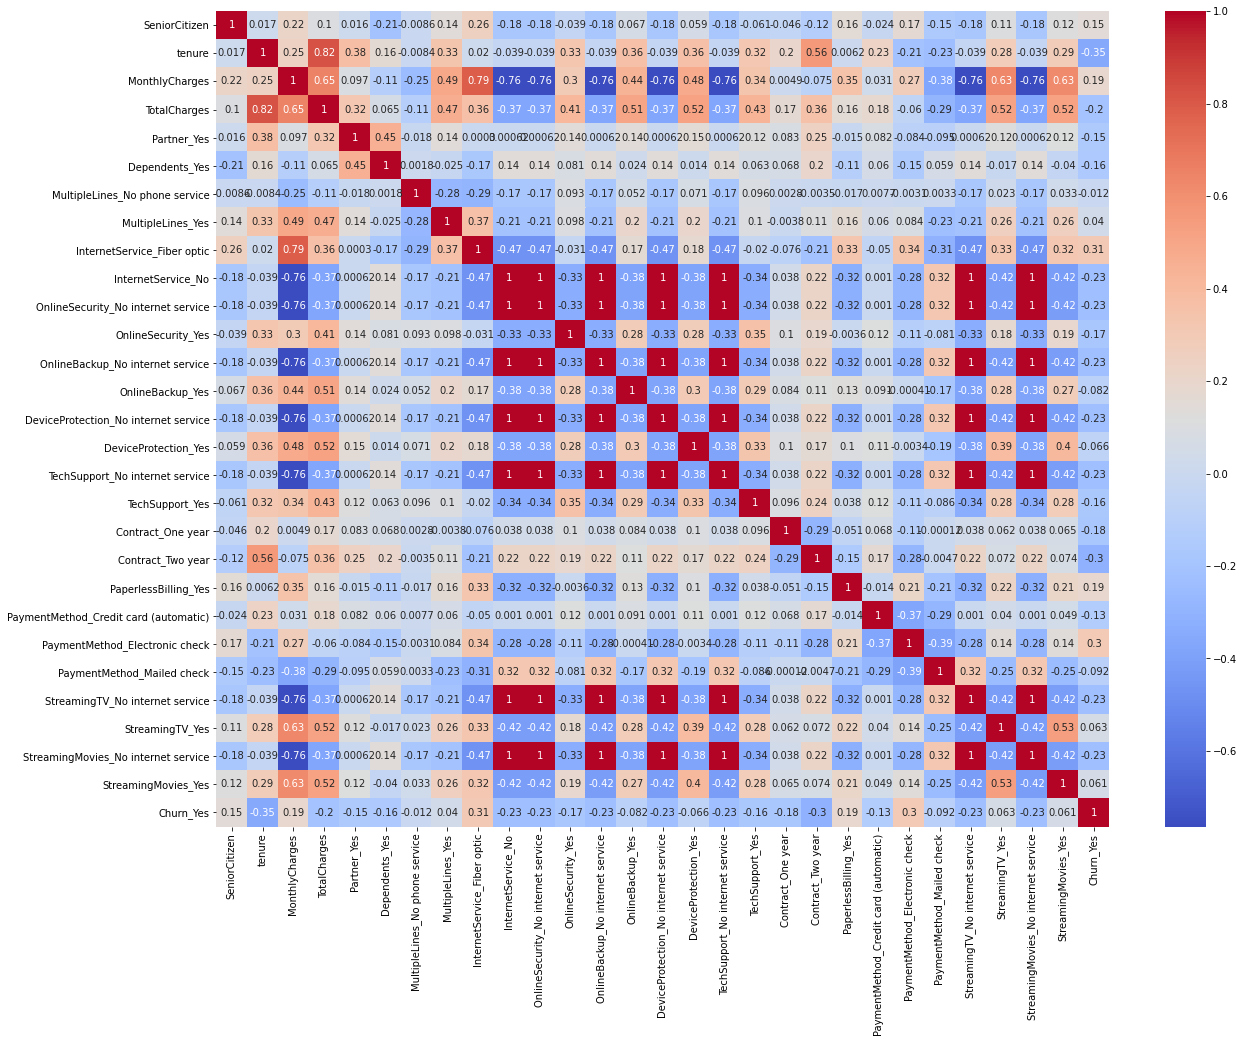

In [ ]:
fig = plt.figure(figsize=(20, 15))
sns.heatmap(df3.corr(), annot= True, cmap= 'coolwarm')

**Model fitting & Evaluation**

In [ ]:
## Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc, recall_score, plot_roc_curve

In [ ]:
X = df3.drop(['Churn_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
              'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Partner_Yes', 'Dependents_Yes'], axis= 1)
y = df3['Churn_Yes']

In [ ]:
df3.sample(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Churn_Yes
4366,1,24,79.85,1857.75,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
915,1,1,73.55,73.55,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
4848,0,5,93.90,486.85,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1
4179,1,12,73.30,828.05,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
89,0,29,33.75,1009.25,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0


**Split train and test dataset**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

**Logistic Regression**

In [ ]:
log_reg = LogisticRegression()

In [ ]:
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
log_reg_pred = log_reg.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, log_reg_pred))

[[1380  159]
 [ 243  331]]


In [ ]:
print(classification_report(y_test, log_reg_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1539
           1       0.68      0.58      0.62       574

    accuracy                           0.81      2113
   macro avg       0.76      0.74      0.75      2113
weighted avg       0.80      0.81      0.80      2113



In [ ]:
log_proba = log_reg.predict_proba(X_test)[:, 1]
fpr_log, tpr_log, log_ = roc_curve(y_test, log_proba)
log_roc_auc = auc(fpr_log, tpr_log)

**Support Vector Machine**

In [ ]:
X_nom = MinMaxScaler()
X_train_nom = X_nom.fit_transform(X_train)
X_test_nom = X_nom.fit_transform(X_test)

In [ ]:
svc_param = {'C' : [0.01, 0.1, 0.5, 1, 10, 50, 100, 150, 200],
            'gamma' : [0.0001, 0.001, 0.01, 0.1, 0.10],
             'probability' : [True]}
svc = GridSearchCV(SVC(), svc_param, verbose= 1)
svc.fit(X_train_nom, y_train)
svc.best_params_            

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed: 13.8min finished


{'C': 10, 'gamma': 0.01, 'probability': True}

In [ ]:
svc_pred = svc.predict(X_test_nom)

In [ ]:
print(confusion_matrix(y_test, svc_pred))

[[1407  132]
 [ 281  293]]


In [ ]:
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1539
           1       0.69      0.51      0.59       574

    accuracy                           0.80      2113
   macro avg       0.76      0.71      0.73      2113
weighted avg       0.79      0.80      0.79      2113



In [ ]:
svc_proba = svc.predict_proba(X_test_nom)[:, 1]
fpr_svc, tpr_svc, svc_ = roc_curve(y_test, svc_proba)
svc_roc_auc = auc(fpr_svc, tpr_svc)

**K-NN**

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
accuracy_list = []
for i in range(1, 50) :
  knn = KNeighborsClassifier(n_neighbors= i)
  knn.fit(X_train_nom, y_train)
  predicted_i = knn.predict(X_test_nom)
  accuracy_list.append(accuracy_score(y_test, predicted_i))


In [ ]:
accuracy_list

[0.7326076668244202,
 0.7572172266919073,
 0.7628963558920966,
 0.7718883104590629,
 0.7808802650260294,
 0.7870326549929011,
 0.7931850449597728,
 0.7823000473260767,
 0.7856128726928537,
 0.7856128726928537,
 0.7860861334595362,
 0.7879791765262659,
 0.7832465688594415,
 0.7889256980596309,
 0.783719829626124,
 0.7860861334595362,
 0.783719829626124,
 0.7870326549929011,
 0.7903454803596782,
 0.7927117841930904,
 0.7927117841930904,
 0.7969711310932324,
 0.7927117841930904,
 0.7979176526265973,
 0.7960246095598675,
 0.7960246095598675,
 0.7936583057264552,
 0.7969711310932324,
 0.7979176526265973,
 0.7988641741599621,
 0.79649787032655,
 0.7979176526265973,
 0.7969711310932324,
 0.7988641741599621,
 0.7993374349266446,
 0.8002839564600095,
 0.7983909133932797,
 0.7983909133932797,
 0.8002839564600095,
 0.7993374349266446,
 0.7983909133932797,
 0.8007572172266919,
 0.7974443918599148,
 0.7993374349266446,
 0.7960246095598675,
 0.7993374349266446,
 0.7979176526265973,
 0.79839091339327

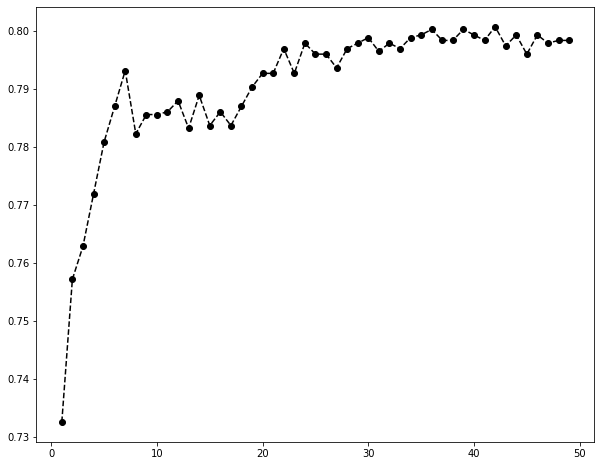

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(range(1, 50), accuracy_list, color= 'black', linestyle= 'dashed', marker= 'o')

In [ ]:
knn = KNeighborsClassifier(n_neighbors= 47)

In [ ]:
knn.fit(X_train_nom, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=47, p=2,
                     weights='uniform')

In [ ]:
knn_pred = knn.predict(X_test_nom)

In [ ]:
print(confusion_matrix(y_test, knn_pred))

[[1371  168]
 [ 259  315]]


In [ ]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1539
           1       0.65      0.55      0.60       574

    accuracy                           0.80      2113
   macro avg       0.75      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113



In [ ]:
knn_proba = knn.predict_proba(X_test_nom)[:, 1]
fpr_knn, tpr_knn, knn_ = roc_curve(y_test, knn_proba)
knn_roc_auc = auc(fpr_knn, tpr_knn)

**Decision Tree**

In [ ]:
dtree_param = {'max_depth' : [2, 3, 4, 5, 6, 8, 10], 
              'min_samples_leaf' : [1, 2, 4, 5, 6, 8, 10]}
dtree = GridSearchCV(DecisionTreeClassifier(), dtree_param, verbose= 1)
dtree.fit(X_train_nom, y_train)
dtree.best_params_

Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 245 out of 245 | elapsed:    2.8s finished


{'max_depth': 5, 'min_samples_leaf': 10}

In [ ]:
dtree_pred = dtree.predict(X_test_nom)

In [ ]:
print(confusion_matrix(y_test, dtree_pred))

[[1323  216]
 [ 221  353]]


In [ ]:
print(classification_report(y_test, dtree_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1539
           1       0.62      0.61      0.62       574

    accuracy                           0.79      2113
   macro avg       0.74      0.74      0.74      2113
weighted avg       0.79      0.79      0.79      2113



In [ ]:
dtree_proba = dtree.predict_proba(X_test_nom)[:, 1]
fpr_dtree, tpr_dtree, dtree_ = roc_curve(y_test, dtree_proba)
dtree_roc_auc = auc(fpr_dtree, tpr_dtree)

**Random Forest**

In [ ]:
rf_param = {'max_depth' : [4, 6, 8, 10, 12, 14, 16, 'none'],
            'min_samples_leaf' : [1, 2, 4, 6, 8],
            'n_estimators' : [40, 50, 55, 75, 85, 95, 100, 120]}
rf = GridSearchCV(RandomForestClassifier(), rf_param, verbose= 1)
rf.fit(X_train_nom, y_train)
rf.best_params_

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
/usr/local/lib/p

{'max_depth': 10, 'min_samples_leaf': 4, 'n_estimators': 55}

In [ ]:
rf_pred = rf.predict(X_test_nom)

In [ ]:
print(confusion_matrix(y_test, rf_pred))

[[1409  130]
 [ 288  286]]


In [ ]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1539
           1       0.69      0.50      0.58       574

    accuracy                           0.80      2113
   macro avg       0.76      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113



In [ ]:
rf_proba = rf.predict_proba(X_test_nom)[:, 1]
fpr_rf, tpr_rf, rf_ = roc_curve(y_test, rf_proba)
rf_roc_auc = auc(fpr_rf, tpr_rf)

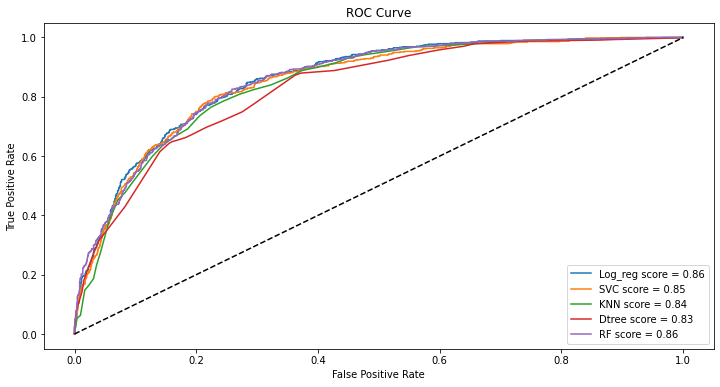

In [ ]:
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_log, tpr_log, label= 'Log_reg score = %0.2f' % log_roc_auc)
plt.plot(fpr_svc, tpr_svc, label= 'SVC score = %0.2f' % svc_roc_auc)
plt.plot(fpr_knn, tpr_knn, label= 'KNN score = %0.2f' % knn_roc_auc)
plt.plot(fpr_dtree, tpr_dtree, '', label= 'Dtree score = %0.2f' % dtree_roc_auc)
plt.plot(fpr_rf, tpr_rf, '', label= 'RF score = %0.2f' % rf_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.savefig('ROC.png')
plt.show()

**Conclusion**

Due to our data set is an imbalance dataset and we selected the ROC curve as a measuring tool. The evident from the plot that the logistic regression ROC curve has the highest AUC score. We can interpret that the logistic regression did a better job of classifying the positive class in this datase and since we would like to know which customers will churn, so we're especially interested in the true positive. If we measure by the recall the decision tree is also the good one to distinguish the actual churn customers.
